In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [3]:


path = os.listdir('/kaggle/input/gujarati-language-hand-signs/data/train')
classes = {
    'ka': 0, 'kha': 1, 'ga': 2, 'gha': 3, 'cha': 4, 'chha': 5, 'ja': 6, 'za': 7, 'ta': 8, 'tha': 9,
    'dda': 10, 'dhha': 11, 'nna': 12, 'ta': 13, 'tha': 14, 'da': 15, 'dha': 16, 'na': 17, 'pa': 18,
    'fa': 19, 'ba': 20, 'bha': 21, 'ma': 22, 'ya': 23, 'ra': 24, 'la': 25, 'va': 26, 'sha': 27,
    'sh': 28, 'sa': 29, 'ha': 30, 'lla': 31, 'ksha': 32, 'gna': 33
}

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/gujarati-language-hand-signs/data/train'

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/kaggle/input/gujarati-language-hand-signs/data/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
print(len(X))
print(len(Y))

3574
3574


In [5]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [6]:
import pandas as pd
pd.Series(Y).value_counts()

11    124
5     121
0     116
19    116
15    115
7     115
13    115
25    114
21    114
33    114
24    113
16    113
30    112
10    111
28    111
1     111
4     111
27    111
3     111
31    110
26    110
2     110
23    110
14    110
20    110
6     110
18    110
22    108
29    108
12    108
32    108
17     94
Name: count, dtype: int64

In [7]:
X.shape, X_updated.shape

((3574, 200, 200), (3574, 40000))

In [8]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3574, 40000)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.30)

In [10]:
xtrain.shape, xtest.shape


((2501, 40000), (1073, 40000))

In [11]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Random forest

In [12]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(xtrain, ytrain)
rf_pred = rf_classifier.predict(xtest)
rf_accuracy = accuracy_score(ytest, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8844361602982292


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation metrics
accuracy = accuracy_score(ytest, rf_pred)
precision = precision_score(ytest, rf_pred, average='weighted')
recall = recall_score(ytest, rf_pred, average='weighted')
f1 = f1_score(ytest, rf_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8844361602982292
Precision: 0.8853297299866005
Recall: 0.8844361602982292
F1 Score: 0.8833685416651981


In [16]:
# Predict on test data using Random Forest
rf_test_pred = rf_classifier.predict(xtest)
rf_test_pred

array([24, 22,  0, ..., 27, 28,  3])

In [17]:

# Print accuracy of predictions
print("Random Forest Test Accuracy:", accuracy_score(ytest, rf_test_pred))

Random Forest Test Accuracy: 0.8844361602982292


In [18]:
dec = {
    'ka': 0, 'kha': 1, 'ga': 2, 'gha': 3, 'cha': 4, 'chha': 5, 'ja': 6, 'za': 7, 'ta': 8, 'tha': 9,
    'dda': 10, 'dhha': 11, 'nna': 12, 'ta': 13, 'tha': 14, 'da': 15, 'dha': 16, 'na': 17, 'pa': 18,
    'fa': 19, 'ba': 20, 'bha': 21, 'ma': 22, 'ya': 23, 'ra': 24, 'la': 25, 'va': 26, 'sha': 27,
    'sh': 28, 'sa': 29, 'ha': 30, 'lla': 31, 'ksha': 32, 'gna': 33
}

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


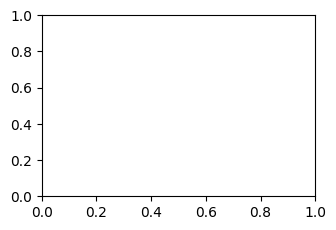

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/gujarati-language-hand-signs/data/test/')
c=1
for i in os.listdir('/kaggle/input/gujarati-language-hand-signs/data/test/')[0:8]:
    plt.subplot(3,3,c)
    
    # print(i[0])
    img = cv2.imread('/kaggle/input/gujarati-language-hand-signs/data/test/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf_test_pred
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [1]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Perform K-fold cross-validation with 5 folds for Random Forest
k = 5
cross_val_accuracies = cross_val_score(rf_classifier, X_updated, Y, cv=k, scoring='accuracy')

# Plotting cross-validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, k + 1), cross_val_accuracies, marker='o', color='b', label='Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Random Forest')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

print(f"Mean Cross-Validation Accuracy: {cross_val_accuracies.mean()}")


NameError: name 'rf_classifier' is not defined